In [4]:
import numpy as np
import pandas as pd
import os
from os import path
from glob import glob
import matplotlib.pyplot as plt
import sys
sys.path.append('../scms_py/')
from utils import *
from processing import *
from scMSData import scMSData
from analysis import scMSAnalysis
import scanpy as sc
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import Box, IntSlider
#%matplotlib widget

In [2]:
file_path = '/Volumes/Stuff/Ellis_Joanna/Raw Files for 30k Cells'
cell_file_dir = ['20171016/Scene 1','20171016/Scene 2','20171016/Scene 3','20171016/Scene 4',
                '20171026/Slide 3/Scene 1','20171026/Slide 3/Scene 2','20171026/Slide 3/Scene 3','20171026/Slide 3/Scene 4',
                '20171026/Slide 4/Scene 1','20171026/Slide 4/Scene 2','20171026/Slide 4/Scene 3','20171026/Slide 4/Scene 4',
                '20171103/Slide 1/Scene 1','20171103/Slide 1/Scene 2','20171103/Slide 1/Scene 3','20171103/Slide 1/Scene 4',
                '20171103/Slide 2/Scene 1','20171103/Slide 2/Scene 2','20171103/Slide 2/Scene 3','20171103/Slide 2/Scene 4',
                '20171103/Slide 3/Scene 1','20171103/Slide 3/Scene 2','20171103/Slide 3/Scene 3','20171103/Slide 3/Scene 4',
                '20171103/Slide 4/Scene 1','20171103/Slide 4/Scene 2','20171103/Slide 4/Scene 3','20171103/Slide 4/Scene 4',
                '20171117/Slide 1/Scene 1','20171117/Slide 1/Scene 2','20171117/Slide 1/Scene 3','20171117/Slide 1/Scene 4',
                '20171117/Slide 2/Scene 1','20171117/Slide 2/Scene 2','20171117/Slide 2/Scene 3','20171117/Slide 2/Scene 4',
                '20171121/Slide 1/Scene 1','20171121/Slide 1/Scene 2','20171121/Slide 1/Scene 3','20171121/Slide 1/Scene 4',
                '20171121/Slide 2/Scene 1','20171121/Slide 2/Scene 2','20171121/Slide 2/Scene 3','20171121/Slide 2/Scene 4',
                '20171121/Slide 3/Scene 1','20171121/Slide 3/Scene 2','20171121/Slide 3/Scene 3','20171121/Slide 3/Scene 4'
                ]

cell_ser_file_dir = []
for cell_file_dir_ in cell_file_dir:
    cell_ser_file_dir += glob(file_path+'/'+cell_file_dir_+'/*.d')

In [14]:
cell_ser_file_dir = glob('sc_dataset_30k/raw/*.d')
cell_ser_file_dir

['sc_dataset_30k/raw/x_13031y_19315.d',
 'sc_dataset_30k/raw/x_12349y_14717.d',
 'sc_dataset_30k/raw/x_8211y_23811.d',
 'sc_dataset_30k/raw/x_8517y_26169.d',
 'sc_dataset_30k/raw/x_9624y_21651.d',
 'sc_dataset_30k/raw/x_17264y_31302.d',
 'sc_dataset_30k/raw/x_17254y_31772.d',
 'sc_dataset_30k/raw/x_15679y_26101.d',
 'sc_dataset_30k/raw/x_7343y_10725.d',
 'sc_dataset_30k/raw/x_18638y_19419.d',
 'sc_dataset_30k/raw/x_14357y_23377.d',
 'sc_dataset_30k/raw/x_5949y_17850.d',
 'sc_dataset_30k/raw/x_12625y_33249.d',
 'sc_dataset_30k/raw/x_13645y_20666.d',
 'sc_dataset_30k/raw/x_6078y_32059.d',
 'sc_dataset_30k/raw/x_14751y_33592.d',
 'sc_dataset_30k/raw/x_15051y_32370.d',
 'sc_dataset_30k/raw/x_8318y_33659.d',
 'sc_dataset_30k/raw/x_14549y_17025.d',
 'sc_dataset_30k/raw/x_15382y_23374.d',
 'sc_dataset_30k/raw/x_12698y_6471.d',
 'sc_dataset_30k/raw/x_14011y_21785.d',
 'sc_dataset_30k/raw/x_15219y_25318.d',
 'sc_dataset_30k/raw/x_6043y_32367.d',
 'sc_dataset_30k/raw/x_10747y_5350.d',
 'sc_datas

In [15]:
scms = scMSData()
scms.processICRData(cell_ser_file_dir, mz_range=(400,1000))

100%|█████████████████████████████████████████| 169/169 [00:28<00:00,  5.84it/s]


In [5]:
scms = scMSData()
scms.loadPeakList('30k_peak_list.pkl')
#scms.processICRData(cell_ser_file_dir_show, mz_range=(400,1000))
# import pickle
# with open('30k_peak_list.pkl', "wb") as output_file:
#     pickle.dump(scms.peak_list, output_file)

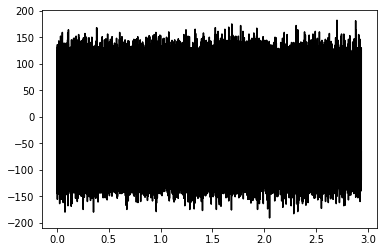

In [11]:
params, fid = scms.loadICRData(cell_ser_file_dir[0])
#plt.figure()
plt.plot(params['t'],fid[0],rasterized=True,c='k')
#plt.savefig('figures/transient.pdf')

In [44]:
spectra_show = widgets.interactive(scms.show_ICRSpectra,
                                   path=cell_ser_file_dir,
                                   mz_low=815.3, mz_high=815.6,peak_centroid=False);

In [45]:
spectra_show

interactive(children=(Dropdown(description='path', options=('sc_dataset_30k/raw/x_13031y_19315.d', 'sc_dataset…

In [ ]:
#scms.convertPeak2imzML('sc_dataset_30k/30k_peak_list')
scms.loadimzMLData('sc_dataset_30k/30k_peak_list.imzml')

TODO: convert indices into real world coordinates


In [35]:
scms.getIntensMtxData(ppm=5, feature_n=0.02, mz_range=(400,1000))

number of mass bins 91631


100%|███████████████████████████████████| 91631/91631 [00:12<00:00, 7370.43it/s]


In [37]:
sc_30K = scMSAnalysis()
sc_30K.preprocessing(scms.intens_mtx,
                     norm_method='l1',
                     feat_drop_rate=0.005,
                     cell_drop_rate=0.005)

filtered intensity matrix with shape (24083, 22146)


In [38]:
ks = [20,40,60,80,100,120,150,200,250,300]
error_k = sc_30K.svd_error_analysis(ks, 0.2)

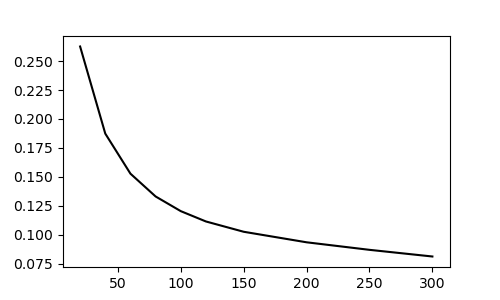

In [39]:
plt.figure(figsize=(5,3))
plt.plot(ks, error_k,c='k')
plt.show()

In [41]:
plt.savefig('figures/error_k.pdf')

In [42]:
feature_n = [100,200,300,400,500,600,700,800,900,1000]
error_n = sc_30K.CX(200,feature_n)

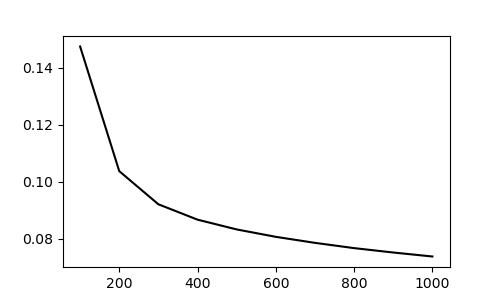

In [47]:
plt.figure(figsize=(5,3))
plt.plot(feature_n, error_n,c='k')
plt.show()

In [48]:
plt.savefig('figures/error_n.pdf')

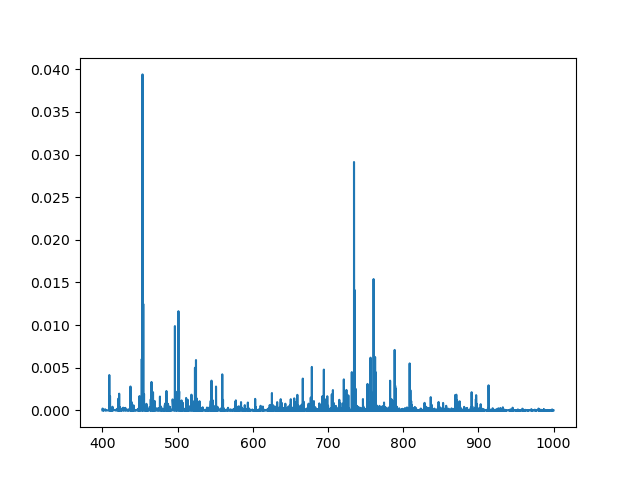

In [61]:
plt.figure()
plt.plot(sc_30K.intens_mtx.columns,sc_30K.intens_mtx.mean(0))
plt.show()

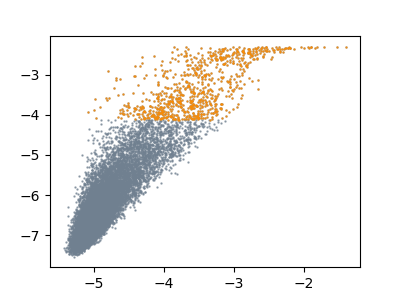

In [54]:
plt.figure(figsize=(4,3))
plt.scatter(np.log10(sc_30K.intens_mtx.mean(0)),np.log10(sc_30K.lev_score), s=0.5, c='slategray',alpha=0.7,rasterized=True)
plt.scatter(np.log10(sc_30K.intens_mtx.mean(0))[score_rank[:800]],np.log10(sc_30K.lev_score)[score_rank[:800]], s=0.5, c='darkorange',alpha=0.7,rasterized=True)
plt.show()

In [55]:
plt.savefig('figures/lev_score.pdf')

In [50]:
score_rank = np.argsort(sc_30K.lev_score)[::-1]

In [64]:
sc_30K.metadata = pd.DataFrame(index=scms.names)

In [60]:
sc_30K.preprocessing(sc_30K.intens_mtx[sc_30K.intens_mtx.columns[score_rank[:800]]],norm_method=None,feat_drop_rate=0.005,cell_drop_rate=0.005)

filtered intensity matrix with shape (24083, 800)


In [66]:
sc_30K.analyze(n_neighbors=30, n_pcs=30,
               min_dist=0.7, resolution = 0.15,
               categories=['leiden'])

computing neighbors..
performing umap...
performing clustering...


In [67]:
show_embed = widgets.interactive(sc_30K.show_cellEmbed, label=sc_30K.adata.obs.columns,
                                 embed_method=sc_30K.adata.obsm.keys(),size=(0.05,1,0.1));

In [68]:
show_embed

interactive(children=(Dropdown(description='label', options=('leiden',), value='leiden'), Dropdown(description…

In [204]:
plt.savefig('figures/intens_count.pdf')

In [208]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10).fit(sc_30K.intens_mtx)

<AxesSubplot:>

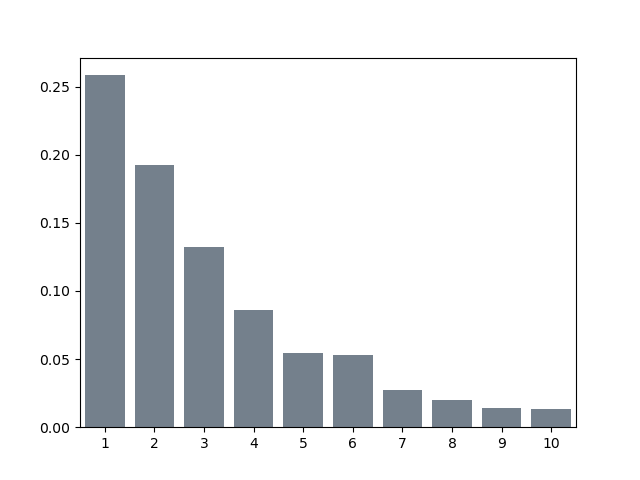

In [218]:
plt.figure()
sns.barplot(y=pca.explained_variance_ratio_,x=np.arange(1,11),color='slategray')

In [239]:
scores = pca.fit_transform(sc_30K.intens_mtx)
scores.shape

(24083, 10)

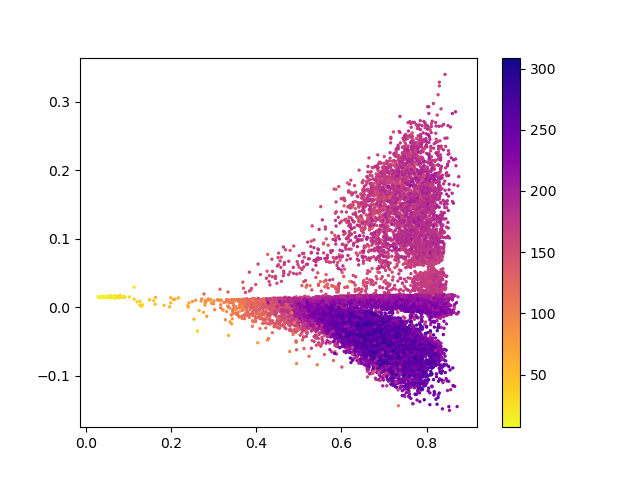

In [321]:
plt.figure()
plt.scatter(sc_30K.intens_mtx.sum(1),scores[:,0],s=2,c=sc_30K.intens_mtx.astype(bool).sum(1),cmap='plasma_r',alpha=1,rasterized=True)
plt.colorbar()

In [322]:
plt.savefig('figures/pc_intens.pdf')

<StemContainer object of 3 artists>

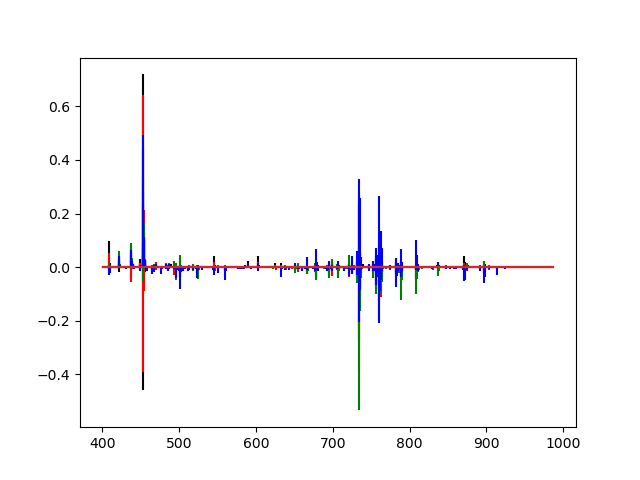

In [271]:
plt.figure()
plt.stem(sc_30K.intens_mtx.columns.astype(float),pca.components_[0],markerfmt=' ',linefmt='k')
plt.stem(sc_30K.intens_mtx.columns.astype(float),pca.components_[1],markerfmt=' ',linefmt='r')
plt.stem(sc_30K.intens_mtx.columns.astype(float),pca.components_[2],markerfmt=' ',linefmt='g')
plt.stem(sc_30K.intens_mtx.columns.astype(float),pca.components_[3],markerfmt=' ',linefmt='b')

In [219]:
plt.savefig('figures/pca_var.pdf')

In [158]:
sc_30K.adata.layers['scaled'] = sc.pp.scale(sc_30K.adata, copy=True, zero_center=True).X
# plt.figure()
# sns.heatmap(sc_30K.adata.layers['scaled'][:,:100],cmap='jet',vmax=10,rasterized=True)

In [144]:
corr = sc_30K.intens_mtx.corr()

In [132]:
plt.savefig('figures/heatmap.pdf')

In [111]:
label = 'leiden'
show_feat = widgets.interactive(sc_30K.show_featrank, label = label, region = sc_30K.adata.obs['leiden'].unique(), 
                                rank_by=sc_30K.feat_rank[label].keys(), num_select=500,
                                num_show=IntSlider(min=0, max=500, step=20, value=0));

In [117]:
show_feat

interactive(children=(Text(value='leiden', description='label'), Dropdown(description='region', index=4, optio…

In [118]:
show_featdist = widgets.interactive(sc_30K.show_featdist, features=show_feat.result['feature names'].astype(str),
                                 embed_method=sc_30K.adata.obsm.keys(),size=(0.05,1,0.1));

interactive(children=(Dropdown(description='features', options=('735.640464996357', '736.6416116484411', '763.…

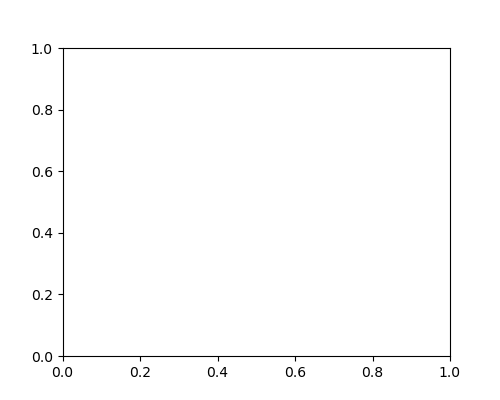

In [119]:
show_featdist

In [99]:
import requests
import io
from tqdm import tqdm

def LipidMaps_annotate(mass_list,adducts,ppm,site_url):
    
    Data = []
    matched = []
    unmatched = []
    
    for i in tqdm(range(len(mass_list))):
        mass = mass_list[i]
        tolerance = ppm*1e-6*mass
        Data_ = []
        for adduct in adducts:
            url = site_url+'/{}/{}/{}'.format(mass,adduct,tolerance)
            
            urlData = requests.get(url).content.decode('utf-8')[7:-9]            
            rawData = pd.read_csv(io.StringIO(urlData),sep='\t',error_bad_lines=False,index_col=False)
            
            Data_.append(rawData)
            #Data.append(rawData)
        df = pd.concat(Data_, ignore_index=True)
        df['Input m/z'] = [mass]*df.shape[0]
        
        if df.empty:
            unmatched.append(mass)
        else:
            matched.append(mass) 
            Data.append(df)
            
    annot_df = pd.concat(Data, ignore_index=True)
    return annot_df, matched, unmatched

In [106]:
#common_lev_mz = list(set(mz_lev[0])&set(mz_lev[1])&set(mz_lev[2])&set(mz_lev[3]))

adducts = ['M+H','M+Na','M+K']
site_url = 'https://www.lipidmaps.org/rest/moverz/LIPIDS'

annot_df, matched, unmatched = LipidMaps_annotate(scms.intens_mtx.columns[score_rank][:10], adducts, 2, site_url)

  0%|                                                                                                  | 0/10 [00:00<?, ?it/s]/var/folders/gw/5vpnntfj7dg102qjxmy0d4yh0000gn/T/ipykernel_57761/703595178.py:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  annot_df, matched, unmatched = LipidMaps_annotate(scms.intens_mtx.columns[score_rank][:10], adducts, 2, site_url)
100%|█████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:23<00:00,  2.34s/it]


In [107]:
annot_df

,Input m/z,Matched m/z,Delta,Name,Formula,Ion
0,453.262894,453.2635,0.0007,ST 28:7;O5,C28H37O5,[M+H]+
1,453.266520,453.2669,0.0004,ST 25:2;O2;S,C25H41O5S,[M+H]+
2,870.680414,870.6817,0.0013,DGCC 43:6,C53H92NO8,[M+H]+
3,870.680414,870.6793,0.0011,ACer 51:4;O6,C51H93NO8Na,[M+Na]+
4,870.680414,870.6793,0.0011,DGCC 41:3,C51H93NO8Na,[M+Na]+
5,870.680414,870.6793,0.0011,HexCer 45:4;O2,C51H93NO8Na,[M+Na]+
